In [1]:
import numpy as np
import torch
print(torch.__version__)

1.4.0+cpu


In [2]:
import matplotlib.pyplot as plt


In [3]:
x = torch.arange(16).view(4,4)

x = torch.tensor(x, dtype=torch.float32) 

print ("X :\n", x)
print("X.shape : \n", x.shape)
print ("X*X^T  :\n", torch.matmul(x,x.transpose(1,0)))  #short: x.mm(x.t())
print ("mean over cols :\n", torch.mean(x,dim=-1))

X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : 
 torch.Size([4, 4])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])


W:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
import pandas as pd

path = 'W:\\progects\\datas_for_andy\\data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [5]:
data[:5]

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


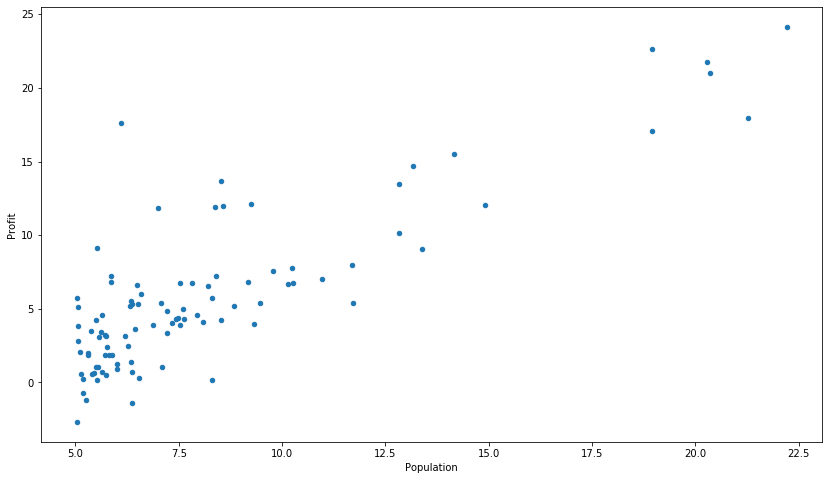

In [6]:
import matplotlib.pyplot as plt  

data.plot(kind='scatter', x='Population', y='Profit', figsize=(14,8))

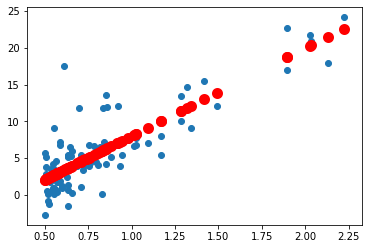

loss =  8.953943


In [7]:
from IPython.display import clear_output

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(data.Population/10, dtype=torch.float32)
y = torch.tensor(data.Profit, dtype=torch.float32)

for i in range(1000):

    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='red', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

# Multiple regression

In [110]:
import numpy as np
data = np.loadtxt('W:\\progects\\datas_for_andy\\data2.txt', delimiter=',')
x, y = data[:,:2], data[:,2]
#'Size', 'Bedrooms', 'Price'

In [111]:
data[:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [112]:
# Normalization
mean = np.mean(x,axis=0)
std = np.std(x,axis=0)
x = (x - mean ) / std

In [113]:
x.shape

(47, 2)

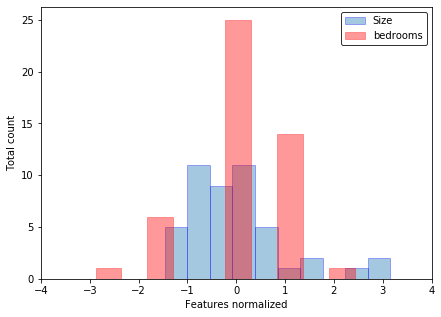

In [114]:
fig = plt.figure(figsize=(7, 5))

plt.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='Size')
plt.hist(x[:,-1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

In [115]:
w = torch.zeros((1, 2), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

In [116]:
for i in range(3500):

    y_pred = w.mm(X.t())  + b
    loss = torch.mean( (y_pred - Y)**2 )
    loss.backward()

    w.data -= 0.01 * w.grad.data
    b.data -= 0.01 * b.grad.data
    
    w.grad.data.zero_()
    b.grad.data.zero_()
print(w,b)

tensor([[109447.5000,  -6578.1807]], requires_grad=True) tensor([340411.9062], requires_grad=True)


In [131]:
paramsNorm = np.array([[1650.0, 3.0]]) 
paramsNorm = (paramsNorm-mean)/std
paramsNorm = paramsNorm.astype(np.float32)
params = torch.tensor(paramsNorm)
# predicting a house price
predict = w.mm(params.t()) + b
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293080.81


In [97]:
#A 3 bedroom / 1650 sqft house will cost $293097.99